#### **Ejercicio:** Métricas de regresión

**Elaborado por:** Fabian Villarreal Sosa

La sección de regresión lineal utilizó R2, también conocida como el coeficiente de determinación como una métrica para evaluar el desempeño de la regresión lineal. También existen otras métricas que puedes usar para evaluar el desempeño de un modelo. Tu tarea es calcular el significado del error absoluto medio (MAE), error cuadrático medio (MSE), y la raíz del error cuadrático medio (RMSE) para el conjunto de datos y modelo de la sección de regresión lineal.

Las fórmulas para cada una de estas se proporcionan más abajo. Utiliza estos, o cualquiera de los recursos disponibles (Google, etcétera) para completar esta tarea.

Si los símbolos matemáticos no son de tu preferencia, deberías recordar que, aunque puedes calcular elementos desde cero, puede resultar ser una pérdida de tu tiempo. Considera usar librerías Python y Google.

**Información métrica:**

* **Coeficiente de determinación**

  $R^{2}=1-\frac{MSE}{Var\left ( y \right )}$

* **Error absoluto medio (MAE):** Media del valor absoluto de los errores. Puedes considerarlo como un error común.

  $\frac{1}{n}\sum_{i=1}^{n}|y_{i}-\hat{y_{i}}|$

* **Error cuadrático medio (MSE):** Media de los errores cuadráticos. MSE "castiga" a los errores más grandes, los cuales tienden a ser útiles en el mundo real. Considera que, más adelante en el curso, cuando ahondemos en cómo los algoritmos de aprendizaje automático funcionan, y que MSE es continuo y diferenciable, facilitará el uso de MAE para la optimización.

  $\frac{1}{n}\sum_{i=1}^{n} \left (y_{i}-\hat{y_{i}}\right )^{2}$

* **Raíz del error cuadrático medio (RMSE):** Raíz cuadrática de la media de los errores cuadráticos. Similar a MSE, pero más popular ya que es visto como más fácil de entender que MSE.

  $\sqrt{\frac{1}{n}\sum_{i=1}^{n} \left (y_{i}-\hat{y_{i}}\right )^{2}}$


In [119]:
# Librerias
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from sklearn.linear_model import LinearRegression

from google.colab import drive

In [120]:
# Acceder a directorio en Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
# Determinar directorio
os.chdir('/content/drive/MyDrive/Coding Dojo/Datos')
os.getcwd()

'/content/drive/MyDrive/Coding Dojo/Datos'

In [122]:
# Cargar datos
df=pd.read_csv('modifiedBostonHousing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [123]:
df.shape

(506, 14)

In [124]:
# Variables de interes
df=df.loc[:, ['RM', 'LSTAT', 'PTRATIO', 'price']]
df.head()

,RM,LSTAT,PTRATIO,price
0,6.575,4.98,15.3,24.0
1,6.421,9.14,17.8,21.6
2,7.185,4.03,17.8,34.7
3,6.998,2.94,18.7,33.4
4,7.147,5.33,18.7,36.2


In [125]:
# Ver si existen valores perdidos
columns_nans=df.columns[df.isna().any()] # que contenga al menos un valor perdido
df[columns_nans].isna().sum()

price    1
dtype: int64

In [126]:
# Quitar valor perdido
df=df.dropna(how='any')

df.isna().sum()

RM         0
LSTAT      0
PTRATIO    0
price      0
dtype: int64

In [127]:
# Eliminar precios negativos
price_filter=df.loc[:, 'price']<0
df=df.loc[~price_filter, :]

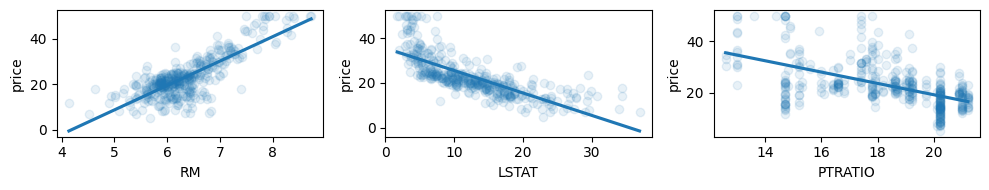

In [128]:
# Ver relacion lineal entre las variables
fig, axes=plt.subplots(nrows=1, ncols=3, figsize=(10,2), dpi=100)
sns.regplot(data=df, x='RM', y='price', ci=None, scatter_kws={'alpha': 0.1}, ax=axes[0])
sns.regplot(data=df, x='LSTAT', y='price', ci=None, scatter_kws={'alpha': 0.1}, ax=axes[1])
sns.regplot(data=df, x='PTRATIO', y='price', ci=None, scatter_kws={'alpha': 0.1}, ax=axes[2])
fig.tight_layout()

In [129]:
df['price'].isna().sum()

0

**Organización de datos en la matriz de características y el vector de destino**

**Ecuación a estimar**

$price_{i} = \beta_{0} + \beta_{1}RM_{i} + \beta_{2}LSTAT_{i} +\beta_{3} PTRATIO_{i} + u_{i}$

In [130]:
# Matriz de caracteristicas

X_var=['RM', 'LSTAT', 'PTRATIO']
X=df.loc[:, X_var].to_numpy()
X.shape

(404, 3)

In [131]:
# Vector de destino

y=df.loc[:, 'price'].to_numpy()
y.shape

(404,)

In [132]:
# Crear instancia del modelo de regresion lineal
ols=LinearRegression(fit_intercept=True) # Regresion lineal con constante

In [133]:
# Estimar el modelo
ols.fit(X, y)

LinearRegression()

In [134]:
# Predecir valores
y_hat=ols.predict(X);

In [135]:
# Coeficientes de variables explicativas
ols.coef_

array([ 6.61452725, -0.44571061, -1.00672009])

In [136]:
# Constante del modelo
ols.intercept_

5.068862183051461

In [137]:
# Ecuacion estimada
b1=ols.coef_[0]
b2=ols.coef_[1]
b3=ols.coef_[2]
b0=ols.intercept_

print('Equation: price = {:.2f} + {:.2f}*RM + {:.2f}*LSTAT + {:.2f}*PTRATIO'.format(b0, b1, b2, b3))

Equation: price = 5.07 + 6.61*RM + -0.45*LSTAT + -1.01*PTRATIO


Definiciones con base en:

Wooldridge, J. (2015). *Introductory Econometrics: A Modern Approach*. Cengage Learning.

In [138]:
# Fuente:
# https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606

from sklearn import metrics

**Coeficiente de determinación**: Es la relación entre la variación explicada y la variación total. Se interpreta como la fracción de la variación muestral en $y$ que es explicada por $x$. 

  $R^{2}=1-\frac{MSE}{Var\left ( y \right )}$

In [139]:
# R2/Coeficiente de determinacion
r2_v1=ols.score(X, y)
r2_v1

0.7848414273030438

In [140]:
MSE=metrics.mean_squared_error(y, y_hat)
var_y=np.var(y)

r2_v2=1-MSE/var_y
r2_v2

0.7848414273030438

**Error absoluto medio (MAE):** Media del valor absoluto de los errores. Puedes considerarlo como un error común.

Es el promedio de los errores de pronóstico absolutos. Se prefiere un MAE pequeño. 

  $\frac{1}{n}\sum_{i=1}^{n}|y_{i}-\hat{y_{i}}|$

In [141]:
# MAE
MAE_v1=metrics.mean_absolute_error(y, y_hat)
MAE_v1

3.2313558816689714

In [142]:
n=y.shape[0]
sum_abs_y_yhat=np.sum(np.absolute(y-y_hat))

MAE_v2=1/n*sum_abs_y_yhat
MAE_v2

3.2313558816689714

**Error cuadrático medio (MSE):** Media de los errores cuadráticos. MSE "castiga" a los errores más grandes, los cuales tienden a ser útiles en el mundo real. Considera que, más adelante en el curso, cuando ahondemos en cómo los algoritmos de aprendizaje automático funcionan, y que MSE es continuo y diferenciable, facilitará el uso de MAE para la optimización.

Representa el error promedio o diferencia promedio entre el valor real y el valor predicho.

  $\frac{1}{n}\sum_{i=1}^{n} \left (y_{i}-\hat{y_{i}}\right )^{2}$

In [143]:
# MSE
MSE_v1=metrics.mean_squared_error(y, y_hat)
MSE_v1

17.915487275260496

In [144]:
n=y.shape[0]
sum_y_yhat2=np.sum((y-y_hat)**2)

MSE_v2=1/n*sum_y_yhat2
MSE_v2

17.915487275260496

**Raíz del error cuadrático medio (RMSE):** Raíz cuadrática de la media de los errores cuadráticos. Similar a MSE, pero más popular ya que es visto como más fácil de entender que MSE.

Es la desviación estándar de la muestra de los errores de pronóstico. 

  $\sqrt{\frac{1}{n}\sum_{i=1}^{n} \left (y_{i}-\hat{y_{i}}\right )^{2}}$

In [145]:
# RMSE
RMSE_v1=np.sqrt(metrics.mean_squared_error(y, y_hat))
RMSE_v1

4.232669048633556

In [146]:
RMSE_v2=np.sqrt(MSE_v2)
RMSE_v2

4.232669048633556